# **1. Perkenalan Dataset**


**1. Overview Dataset**

Dataset Wine Quality – Red Wine merupakan salah satu dataset klasik dalam dunia Machine Learning yang berasal dari penelitian kualitas anggur Portugis jenis Vinho Verde. Dataset ini berisi data kimiawi dari sampel anggur merah yang kemudian dinilai kualitasnya oleh para ahli wine (wine experts).
Tujuan utama penggunaan dataset ini adalah memprediksi kualitas wine berdasarkan parameter fisikokimia (chemical properties).

**2. Sumber Dataset**

Dataset tersedia di:
Kaggle: [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

UCI Machine Learning Repository: [Wine Quality Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

**3. Deskripsi Fitur**

Dataset terdiri dari 11 fitur input hasil pengujian kimia, dan 1 fitur output berupa penilaian kualitas wine.

Input Variables (Fisikokimia):
No	Nama Fitur	Penjelasan
1	fixed acidity	Asam non-volatil yang memengaruhi rasa dasar keasaman pada wine
2	volatile acidity	Asam yang mudah menguap; nilai tinggi menurunkan kualitas karena menyebabkan aroma tak sedap
3	citric acid	Memberi kesegaran pada rasa wine
4	residual sugar	Kandungan gula tersisa; memengaruhi tingkat manis wine
5	chlorides	Kandungan garam (natrium klorida)
6	free sulfur dioxide	Berfungsi mencegah pertumbuhan mikroba
7	total sulfur dioxide	Total kandungan sulfur; jumlah terlalu tinggi dapat menurunkan kualitas aroma
8	density	Kerapatan cairan, dipengaruhi oleh alkohol dan gula
9	pH	Tingkat keasaman wine
10	sulphates	Aditif untuk meningkatkan stabilitas wine
11	alcohol	Persentase alkohol; biasanya berkorelasi positif dengan kualitas
Output Variable

**4. Kompleksitas Dataset**

a. Imbalanced Classes
Sebagian besar sampel jatuh pada kelas normal (nilai 5 dan 6).
Sampel excellent dan poor jumlahnya jauh lebih sedikit.

b. Dataset Relatif Kecil
Jumlah sampel hanya 1.599 baris.

c. Masalah Regression vs Classification
Nilai kualitas bersifat ordinal, sehingga:
Perbedaan antara kualitas 5 dan 6 ≠ perbedaan antara 7 dan 8
Harus diputuskan apakah ingin diperlakukan sebagai klasifikasi multi-kelas atau regresi

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [2]:
print("=" * 50)
print("LOADING DATASET")
print("=" * 50)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

LOADING DATASET


In [3]:
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())


Dataset shape: (1599, 12)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


# **4. Exploratory Data Analysis (EDA)**


In [4]:
print("\n" + "=" * 50)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# 2.1 Info Dataset
print("\n--- Dataset Info ---")
print(df.info())


EXPLORATORY DATA ANALYSIS

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000 

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
print("\n--- Target Distribution ---")
print(df['quality'].value_counts().sort_index())


--- Target Distribution ---
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Count')

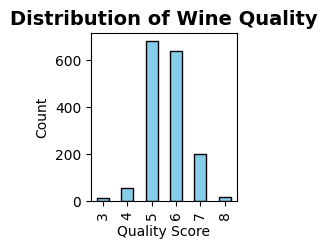

In [9]:
plt.subplot(2, 3, 1)
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')

Text(0.5, 1.0, 'Feature Correlation with Quality')

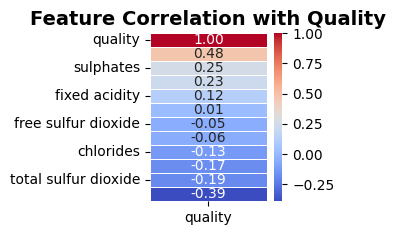

In [10]:
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation with Quality', fontsize=14, fontweight='bold')


✓ EDA visualization saved as 'eda_visualization.png'


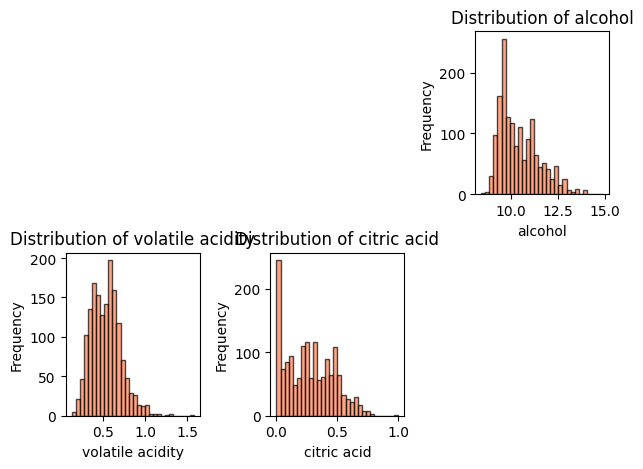

In [11]:
features_to_plot = ['alcohol', 'volatile acidity', 'citric acid']
for idx, feature in enumerate(features_to_plot, start=3):
    plt.subplot(2, 3, idx)
    plt.hist(df[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('eda_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ EDA visualization saved as 'eda_visualization.png'")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
print("\n" + "=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

# 3.1 Create binary classification (good wine: quality >= 6, bad wine: quality < 6)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
print(f"\n--- Binary Classification Distribution ---")
print(df['quality_label'].value_counts())



DATA PREPROCESSING

--- Binary Classification Distribution ---
quality_label
1    855
0    744
Name: count, dtype: int64


In [13]:
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']

# Add feature: acid to alcohol ratio
df['acid_to_alcohol'] = df['total_acidity'] / df['alcohol']

print("\n--- New Features Created ---")
print("✓ total_acidity")
print("✓ acid_to_alcohol")


--- New Features Created ---
✓ total_acidity
✓ acid_to_alcohol


In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

original_shape = df.shape[0]
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col not in ['quality', 'quality_label']]

for col in numerical_cols:
    df = remove_outliers(df, col)

print(f"\n--- Outlier Removal ---")
print(f"Original samples: {original_shape}")
print(f"After outlier removal: {df.shape[0]}")
print(f"Removed: {original_shape - df.shape[0]} samples")


--- Outlier Removal ---
Original samples: 1599
After outlier removal: 1105
Removed: 494 samples


In [15]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

print(f"\n--- Features & Target ---")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")



--- Features & Target ---
Features shape: (1105, 13)
Target shape: (1105,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n--- Train-Test Split ---")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")


--- Train-Test Split ---
X_train: (884, 13)
X_test: (221, 13)
y_train distribution:
quality_label
1    475
0    409
Name: count, dtype: int64
y_test distribution:
quality_label
1    119
0    102
Name: count, dtype: int64


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Feature Scaling ---")
print("✓ StandardScaler applied")
print(f"Mean of scaled features: {X_train_scaled.mean():.4f}")
print(f"Std of scaled features: {X_train_scaled.std():.4f}")


--- Feature Scaling ---
✓ StandardScaler applied
Mean of scaled features: -0.0000
Std of scaled features: 1.0000


In [21]:
import pickle

In [22]:
np.save('X_train_scaled.npy', X_train_scaled)
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [23]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

print("\n--- Saved Files ---")
print("✓ X_train_scaled.npy")
print("✓ X_test_scaled.npy")
print("✓ y_train.npy")
print("✓ y_test.npy")
print("✓ scaler.pkl")
print("✓ feature_names.pkl")


--- Saved Files ---
✓ X_train_scaled.npy
✓ X_test_scaled.npy
✓ y_train.npy
✓ y_test.npy
✓ scaler.pkl
✓ feature_names.pkl


In [23]:
print("\n" + "=" * 50)
print("PREPROCESSING SUMMARY")
print("=" * 50)
print(f"✓ Dataset loaded successfully")
print(f"✓ EDA completed with visualizations")
print(f"✓ Binary classification created (quality >= 6)")
print(f"✓ Feature engineering: 2 new features")
print(f"✓ Outliers removed")
print(f"✓ Data split: 80% train, 20% test")
print(f"✓ Features scaled using StandardScaler")
print(f"✓ All preprocessed data saved")
print("\n🎉 PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 50)


PREPROCESSING SUMMARY
✓ Dataset loaded successfully
✓ EDA completed with visualizations
✓ Binary classification created (quality >= 6)
✓ Feature engineering: 2 new features
✓ Outliers removed
✓ Data split: 80% train, 20% test
✓ Features scaled using StandardScaler
✓ All preprocessed data saved

🎉 PREPROCESSING COMPLETED SUCCESSFULLY!
